### Q. 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망 모델 개발
- 데이터 소스 : from keras.datasets import reuters
- 데이터 및 레이블 벡터 변환 : 주어진 사용자 함수 참조
- 모델 구성 : 2개 은닉층(64개 유닛), 1개 출력층
- 검증(validation) : 훈련 데이터에서 1000개 분리하여 검증 데이터로 사용
- 시각화 : 정확도와 손실율 곡선을 비교 시사점 도출

### Reuters newswire topics classification
Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions)

https://keras.io/datasets/#reuters-newswire-topics-classification

In [22]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, seed=113)

In [23]:
print(len(x_train))

8982


In [24]:
print(len(x_test))

2246


참고: 
https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-5-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EB%B6%84%EB%A5%98-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AC%B8%EC%A0%9C/

In [25]:
# 데이터를 벡터로 변환
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(x_train) # 훈련 데이터 벡터 변환
x_test = vectorize_sequence(x_test) # 테스트 데이터 벡터 변환

In [26]:
# 레이블을 벡터로 변환
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result

one_hot_train_labels = to_one_hot(y_train) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(y_test) # 테스트 레이블 벡터 변환

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 46)                2990      
Total params: 651,374
Trainable params: 651,374
Non-trainable params: 0
________________________________________________

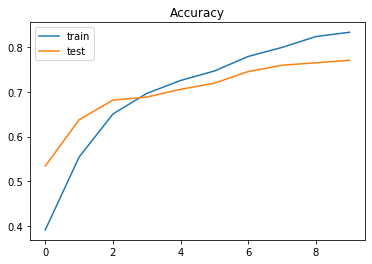

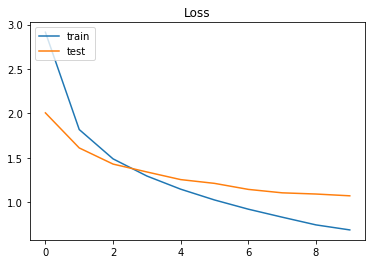

In [27]:
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import h5py
import warnings
warnings.filterwarnings('ignore')

# 모델 정의 16개의 은닉 유닛을 가진 2개의 은닉층(relu) 64개 유닛, 1개의 출력층(softmax)

model = Sequential()
# Input - Layer
model.add(Dense(64, activation='relu', input_shape=(10000, )))
# Hidden - Layers
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(64, activation = "relu"))
# Output- Layer
model.add(Dense(46, activation = "softmax"))
model.summary()


# 모델 컴파일하기
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])


# 학습 실행하기 
hist = model.fit(x_train, one_hot_train_labels
                 , batch_size=1000
                 , epochs=10
                 , verbose=1
                 , validation_data=(x_test, one_hot_test_labels))


# 평가하기 
score = model.evaluate(x_test, one_hot_test_labels, verbose=1)
print("accuracy=", score[1], 'loss=', score[0])

# 가중치데이터 저장하기 
model.save_weights('./dataset/genre-model.hdf5')

# 에폭별 정확도 시각화 및 적정 에폭 제시
# plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
#plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))